In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Numerical differential equations

**Problem**: Solve the logistic equation  
$$\frac{dy}{dt}=y(1-y)$$ with initial condition $y(0)=0.1$.

In [18]:
# Import the required modules
from numpy import array,zeros
import scipy
from scipy import integrate
from printSoln import *
from run_kut4 import *
import pylab as pl

In [19]:
# First set up the right-hand side RHS) of the equation
def f(x,y):
    f=zeros(1)            # sets up RHS as a vector (here of just one element)
    f[0]=y[0]*(1.0-y[0])  # RHS; note that y is also a vector
    return f


        x         y[ 0 ] 
   0.0000e+00    1.0000e-01
   1.0000e+00    2.3197e-01
   2.0000e+00    4.5085e-01
   3.0000e+00    6.9057e-01
   4.0000e+00    8.5849e-01
   5.0000e+00    9.4283e-01


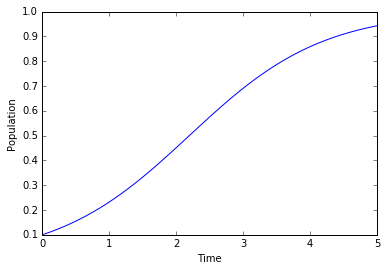

In [24]:
# Example: using Runge-Kutta of 4th order
x = 0.0 # Start of integration
xStop = 5.0 # End of integration
y = array([0.1]) # Initial value of {y}
h = 0.001 # Step size
freq = 1000 # Printout frequency - print the result every 1000 steps

X,Y = integrate(f,x,y,xStop,h) # call the RK4 solver
printSoln(X,Y,freq)            # Print the solution (code on SD)

pl.plot(X,Y[:,0])              # Plot the solution
pl.xlabel('Time')
pl.ylabel('Population')
pl.show()


In [21]:
# Same example equation solved with the internal solver

# First set up the right-hand side RHS) of the equation
# NOTE THE DIFFERENT ORDER OF THE FUNCTION ARGUMENTS COMPARED TO ABOVE
def g(y,x):
    g=zeros(1)            # sets up RHS as a vector 
    g[0]=y[0]*(1.0-y[0])  # RHS; note that y is also a vector
    return g

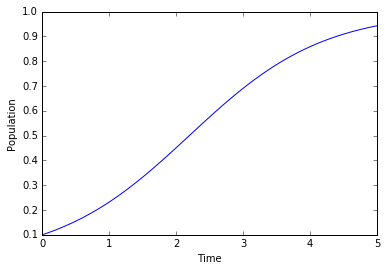

In [23]:
x=np.linspace(0,5,100) # where do we want the solution

y0=array([0.1])        # initial condition

z=scipy.integrate.odeint(g,y0,x) # call the solver
z=z.reshape(np.size(x))          # reformat the answer

pl.plot(x,z)              # Plot the solution
pl.xlabel('Time')
pl.ylabel('Population')
pl.show()

## Systems of equations 

** Problem ** Solve the predator-prey equations (presented in class):

\begin{eqnarray}
\frac{dN}{dt}&=&N(a-bP)\\
\frac{dP}{dt}&=&P(cN-d)
\end{eqnarray}

where $a=c=1$, $b=d=1$ and with initial conditions $N(0)=0.1$, $P(0)=0.03$.


        x         y[ 0 ]        y[ 1 ] 
   0.0000e+00    1.0000e-01    3.0000e-02
   1.0000e+00    2.6454e-01    4.8052e-03
   2.0000e+00    7.1571e-01    1.0230e-03
   3.0000e+00    1.9430e+00    4.7308e-04
   4.0000e+00    5.2735e+00    1.7999e-03
   5.0000e+00    1.0558e+01    1.3727e+00
   6.0000e+00    5.9415e-02    1.4783e+00
   7.0000e+00    4.4089e-02    2.0868e-01
   8.0000e+00    9.9717e-02    3.0180e-02
   9.0000e+00    2.6375e-01    4.8316e-03
   1.0000e+01    7.1355e-01    1.0272e-03


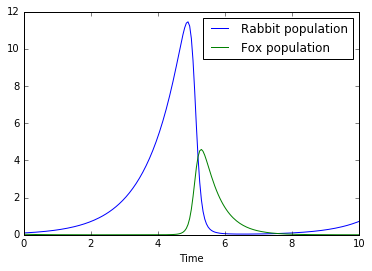

In [25]:
# Define right-hand sides of equations (into a vector!). 
# 'y', containing all functions to be solved for, is also a vector 
def F(x,y,a=1.0,b=2.0,c=1.0,d=2.0):
    F = zeros(2)
    F[0] = y[0]*(a-b*y[1])
    F[1] = y[1]*(c*y[0]-d)
    return F

x = 0.0 # Start of integration
xStop = 10.0 # End of integration
y = array([0.1, 0.03]) # Initial values of {y}
h = 0.05 # Step size
freq = 20 # Printout frequency
X,Y = integrate(F,x,y,xStop,h)
printSoln(X,Y,freq)
pl.plot(X,Y[:,0],label='Rabbit population')
pl.plot(X,Y[:,1],label='Fox population')
pl.xlabel('Time')
pl.legend()
pl.show()


## Stiff equation example

** Problem ** Solve the equation modelling flame propagation
$$\dot{y}=y^2-y^3$$
for $0\leq t\leq 2/\delta$, $y(0)=\delta$ and $\delta=0.001$.

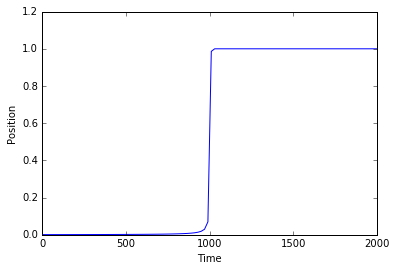

In [28]:
# Define the right hand side
def f(y,t):
    return y**2-y**3

# Parameter
delta=0.001
# Where do we want the solution?
x=np.linspace(0,2./delta,100)
# Call the solver
z=scipy.integrate.odeint(f,delta,x)
z=z.reshape(np.size(x))          # reformat the answer

pl.plot(x,z)              # Plot the solution
pl.xlabel('Time')
pl.ylabel('Position')
pl.show()